Co-Relation between BANK NIFTY and FINNIFTY

In [1]:
import pandas as pd

df_BANK_NIFTY = pd.read_csv("NSEBANK.csv",na_values=['null'],parse_dates=True,infer_datetime_format=True)
df_FINNIFTY = pd.read_csv("NIFTY_FIN_SERVICE.csv",na_values=['null'],parse_dates=True,infer_datetime_format=True)

df_BANK_NIFTY.head()
df_FINNIFTY.head()

df_FINNIFTY.corrwith(df_BANK_NIFTY)
#axis = 1

Open         0.939024
High         0.946520
Low          0.937766
Close        0.940698
Adj Close    0.940697
Volume      -0.006034
dtype: float64

Nifty Price Analysis Model

In [2]:
#Importing the libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib. pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from keras. layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib. dates as mandates
from sklearn import linear_model
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras. callbacks import EarlyStopping
from keras. optimizers import Adam
from keras.models import load_model
from keras. layers import LSTM
from keras. utils.vis_utils import plot_model

In [3]:
#Importing the dataset
BANK_NIFTY_DATA_1=pd.read_csv("BANKNIFTY.csv",na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)
BANK_NIFTY_DATA_1.head()
BANK_NIFTY_DATA_1.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1.230000e+03
mean,33426.785822,33679.937789,33119.534717,33403.526763,33403.218918,1.810773e+06
std,7044.928437,7024.210759,7067.248575,7048.389965,7048.420638,5.172566e+07
min,16759.949219,17681.699219,16116.250000,16917.650391,16917.453125,0.000000e+00
25%,28580.674317,28806.799805,28143.312500,28567.824707,28567.492676,0.000000e+00
50%,33738.298829,34072.525391,33447.076172,33813.349610,33812.955079,1.436500e+05
75%,38716.400390,39020.900391,38471.474610,38701.175782,38700.726563,2.371750e+05
max,46285.851563,46369.500000,46028.750000,46231.500000,46231.500000,1.798102e+09


In [4]:
#Cleaning data
print("Dataframe Shape: ", BANK_NIFTY_DATA_1. shape)
print("Null Value Present: ", BANK_NIFTY_DATA_1.isnull().values.any())
#If any null value is present in the data the below line can be used to remove that particular column 
BANK_NIFTY_DATA = BANK_NIFTY_DATA_1.dropna()
#After cleaning
print("Dataframe Shape: ", BANK_NIFTY_DATA. shape)
print("Null Value Present: ", BANK_NIFTY_DATA.isnull().values.any())

Dataframe Shape:  (1236, 6)
Null Value Present:  True
Dataframe Shape:  (1230, 6)
Null Value Present:  False


<AxesSubplot:xlabel='Date'>

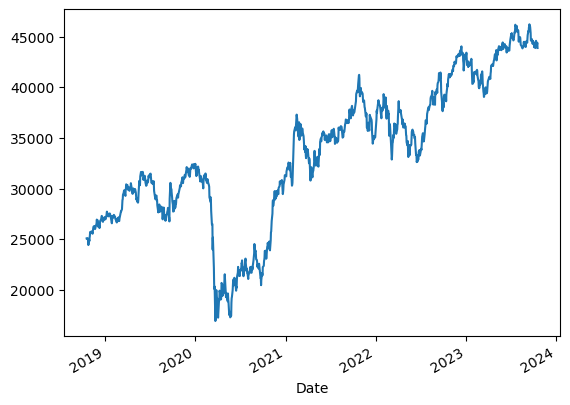

In [5]:
#Plotting initial data
BANK_NIFTY_DATA["Adj Close"].plot()

In [6]:
#Set Target Variable
output_var = pd.DataFrame(BANK_NIFTY_DATA['Adj Close'])
#Selecting the Features which we want to analyze
features = ['Open', 'High', 'Low', 'Volume']

In [7]:
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(BANK_NIFTY_DATA[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=BANK_NIFTY_DATA.index)
feature_transform.head()

,Open,High,Low,Volume
Date,,,,
2018-10-19,0.277944,0.264789,0.294405,0.0
2018-10-22,0.295480,0.272696,0.297705,0.0
2018-10-23,0.271861,0.259445,0.289800,0.0
2018-10-24,0.289669,0.267542,0.291631,0.0
2018-10-25,0.273711,0.254312,0.286857,0.0


In [8]:
#Splitting training and test set
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

In [9]:
#Building the LSTM Model
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
plot_model(lstm, show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [13]:
#Training set
history=lstm.fit(X_train, y_train, epochs=800, batch_size=8, verbose=1, shuffle=False)

Epoch 1/800
140/140 [==============================] - 5s 4ms/step - loss: 1084131584.0000
Epoch 2/800
140/140 [==============================] - 1s 4ms/step - loss: 1084008320.0000
Epoch 3/800
140/140 [==============================] - 1s 4ms/step - loss: 1083683968.0000
Epoch 4/800
140/140 [==============================] - 1s 4ms/step - loss: 1083102976.0000
Epoch 5/800
140/140 [==============================] - 1s 4ms/step - loss: 1082295424.0000
Epoch 6/800
140/140 [==============================] - 1s 4ms/step - loss: 1081310464.0000
Epoch 7/800
140/140 [==============================] - 1s 4ms/step - loss: 1080179072.0000
Epoch 8/800
140/140 [==============================] - 1s 4ms/step - loss: 1078919040.0000
Epoch 9/800
140/140 [==============================] - 1s 4ms/step - loss: 1077539328.0000
Epoch 10/800
140/140 [==============================] - 1s 4ms/step - loss: 1076048256.0000
Epoch 11/800
140/140 [==============================] - 1s 6ms/step - loss: 1074450432.00

140/140 [==============================] - 1s 4ms/step - loss: 740560896.0000
Epoch 91/800
140/140 [==============================] - 1s 4ms/step - loss: 734546752.0000
Epoch 92/800
140/140 [==============================] - 1s 4ms/step - loss: 728505920.0000
Epoch 93/800
140/140 [==============================] - 1s 4ms/step - loss: 722439424.0000
Epoch 94/800
140/140 [==============================] - 1s 4ms/step - loss: 716347712.0000
Epoch 95/800
140/140 [==============================] - 1s 4ms/step - loss: 710231552.0000
Epoch 96/800
140/140 [==============================] - 1s 4ms/step - loss: 704091648.0000
Epoch 97/800
140/140 [==============================] - 1s 4ms/step - loss: 697929152.0000
Epoch 98/800
140/140 [==============================] - 1s 5ms/step - loss: 691744128.0000
Epoch 99/800
140/140 [==============================] - 1s 5ms/step - loss: 685537920.0000
Epoch 100/800
140/140 [==============================] - 1s 4ms/step - loss: 679310720.0000
Epoch 101/8

140/140 [==============================] - 1s 4ms/step - loss: 193481600.0000
Epoch 180/800
140/140 [==============================] - 1s 4ms/step - loss: 188384832.0000
Epoch 181/800
140/140 [==============================] - 1s 6ms/step - loss: 183340112.0000
Epoch 182/800
140/140 [==============================] - 1s 5ms/step - loss: 178348208.0000
Epoch 183/800
140/140 [==============================] - 1s 4ms/step - loss: 173410144.0000
Epoch 184/800
140/140 [==============================] - 1s 4ms/step - loss: 168526944.0000
Epoch 185/800
140/140 [==============================] - 1s 4ms/step - loss: 163699472.0000
Epoch 186/800
140/140 [==============================] - 1s 4ms/step - loss: 158928880.0000
Epoch 187/800
140/140 [==============================] - 1s 4ms/step - loss: 154215760.0000
Epoch 188/800
140/140 [==============================] - 1s 4ms/step - loss: 149561360.0000
Epoch 189/800
140/140 [==============================] - 1s 4ms/step - loss: 144966368.0000
Ep

140/140 [==============================] - 1s 4ms/step - loss: 1808135.1250
Epoch 270/800
140/140 [==============================] - 1s 5ms/step - loss: 1794144.5000
Epoch 271/800
140/140 [==============================] - 1s 4ms/step - loss: 1780322.1250
Epoch 272/800
140/140 [==============================] - 1s 4ms/step - loss: 1766591.7500
Epoch 273/800
140/140 [==============================] - 1s 4ms/step - loss: 1752956.8750
Epoch 274/800
140/140 [==============================] - 1s 4ms/step - loss: 1739408.2500
Epoch 275/800
140/140 [==============================] - 1s 4ms/step - loss: 1725876.2500
Epoch 276/800
140/140 [==============================] - 1s 4ms/step - loss: 1712412.5000
Epoch 277/800
140/140 [==============================] - 1s 4ms/step - loss: 1698987.7500
Epoch 278/800
140/140 [==============================] - 1s 5ms/step - loss: 1685641.6250
Epoch 279/800
140/140 [==============================] - 1s 4ms/step - loss: 1672298.6250
Epoch 280/800
140/140 [=

140/140 [==============================] - 1s 4ms/step - loss: 770205.0625
Epoch 361/800
140/140 [==============================] - 1s 4ms/step - loss: 761364.4375
Epoch 362/800
140/140 [==============================] - 1s 4ms/step - loss: 752576.8750
Epoch 363/800
140/140 [==============================] - 1s 4ms/step - loss: 743839.5625
Epoch 364/800
140/140 [==============================] - 1s 4ms/step - loss: 735168.3750
Epoch 365/800
140/140 [==============================] - 1s 4ms/step - loss: 726550.4375
Epoch 366/800
140/140 [==============================] - 1s 4ms/step - loss: 717986.0000
Epoch 367/800
140/140 [==============================] - 1s 4ms/step - loss: 709482.0000
Epoch 368/800
140/140 [==============================] - 1s 5ms/step - loss: 701031.1250
Epoch 369/800
140/140 [==============================] - 1s 4ms/step - loss: 692638.2500
Epoch 370/800
140/140 [==============================] - 1s 4ms/step - loss: 684299.8125
Epoch 371/800
140/140 [============

140/140 [==============================] - 1s 4ms/step - loss: 196238.4844
Epoch 453/800
140/140 [==============================] - 1s 4ms/step - loss: 192680.2188
Epoch 454/800
140/140 [==============================] - 1s 4ms/step - loss: 189172.0156
Epoch 455/800
140/140 [==============================] - 1s 4ms/step - loss: 185722.5781
Epoch 456/800
140/140 [==============================] - 1s 4ms/step - loss: 182326.7969
Epoch 457/800
140/140 [==============================] - 1s 4ms/step - loss: 178996.0156
Epoch 458/800
140/140 [==============================] - 1s 5ms/step - loss: 175713.3750
Epoch 459/800
140/140 [==============================] - 1s 4ms/step - loss: 172490.1875
Epoch 460/800
140/140 [==============================] - 1s 4ms/step - loss: 169324.7812
Epoch 461/800
140/140 [==============================] - 1s 4ms/step - loss: 166214.5312
Epoch 462/800
140/140 [==============================] - 1s 4ms/step - loss: 163164.3750
Epoch 463/800
140/140 [============

140/140 [==============================] - 1s 4ms/step - loss: 71476.1953
Epoch 545/800
140/140 [==============================] - 1s 4ms/step - loss: 71449.8984
Epoch 546/800
140/140 [==============================] - 1s 4ms/step - loss: 71426.3047
Epoch 547/800
140/140 [==============================] - 1s 4ms/step - loss: 71405.2422
Epoch 548/800
140/140 [==============================] - 1s 4ms/step - loss: 71386.2500
Epoch 549/800
140/140 [==============================] - 1s 4ms/step - loss: 71369.2031
Epoch 550/800
140/140 [==============================] - 1s 4ms/step - loss: 71353.9453
Epoch 551/800
140/140 [==============================] - 1s 4ms/step - loss: 71340.1172
Epoch 552/800
140/140 [==============================] - 1s 4ms/step - loss: 71327.6562
Epoch 553/800
140/140 [==============================] - 1s 4ms/step - loss: 71316.0703
Epoch 554/800
140/140 [==============================] - 1s 4ms/step - loss: 71305.5391
Epoch 555/800
140/140 [=======================

140/140 [==============================] - 1s 4ms/step - loss: 70928.5156
Epoch 638/800
140/140 [==============================] - 1s 4ms/step - loss: 70924.3906
Epoch 639/800
140/140 [==============================] - 1s 4ms/step - loss: 70920.1953
Epoch 640/800
140/140 [==============================] - 1s 4ms/step - loss: 70916.1172
Epoch 641/800
140/140 [==============================] - 1s 4ms/step - loss: 70911.9141
Epoch 642/800
140/140 [==============================] - 1s 4ms/step - loss: 70907.7578
Epoch 643/800
140/140 [==============================] - 1s 4ms/step - loss: 70903.5469
Epoch 644/800
140/140 [==============================] - 1s 4ms/step - loss: 70899.4062
Epoch 645/800
140/140 [==============================] - 1s 4ms/step - loss: 70895.2812
Epoch 646/800
140/140 [==============================] - 1s 4ms/step - loss: 70891.0938
Epoch 647/800
140/140 [==============================] - 1s 4ms/step - loss: 70886.9531
Epoch 648/800
140/140 [=======================

140/140 [==============================] - 1s 4ms/step - loss: 70542.3750
Epoch 731/800
140/140 [==============================] - 1s 4ms/step - loss: 70538.2344
Epoch 732/800
140/140 [==============================] - 1s 4ms/step - loss: 70534.1016
Epoch 733/800
140/140 [==============================] - 1s 4ms/step - loss: 70529.9531
Epoch 734/800
140/140 [==============================] - 1s 4ms/step - loss: 70525.7578
Epoch 735/800
140/140 [==============================] - 1s 4ms/step - loss: 70521.5625
Epoch 736/800
140/140 [==============================] - 1s 4ms/step - loss: 70517.4688
Epoch 737/800
140/140 [==============================] - 1s 4ms/step - loss: 70513.3125
Epoch 738/800
140/140 [==============================] - 1s 4ms/step - loss: 70509.1719
Epoch 739/800
140/140 [==============================] - 1s 4ms/step - loss: 70505.0078
Epoch 740/800
140/140 [==============================] - 1s 4ms/step - loss: 70500.8594
Epoch 741/800
140/140 [=======================

In [14]:
#Predicting the data
y_pred= lstm.predict(X_test)

4/4 [==============================] - 1s 6ms/step


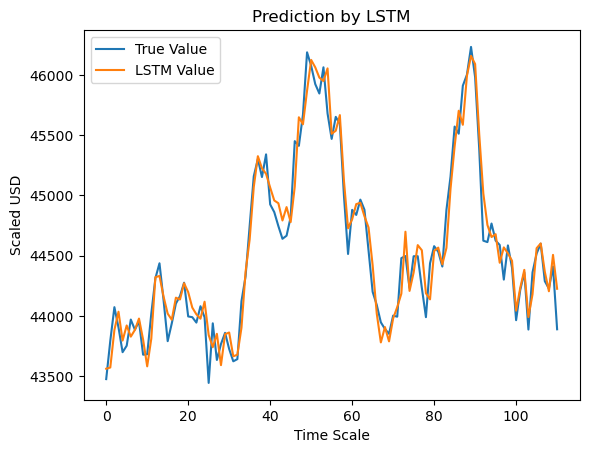

In [15]:
#plotting the real and predicted data
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title("Prediction by LSTM")
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()

In [17]:
lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                4736      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 4,769
Trainable params: 4,769
Non-trainable params: 0
_________________________________________________________________
